# <center>**Xây dựng cây quyết định và rừng cây trên dữ liệu bệnh tiểu đường**<Center>

Mục tiêu:  
- Xây dựng và so sánh 2 mô hình Decision Tree và Random Forest  
- Đánh giá hiệu suất, feature importance  
- Đưa ra kết luận mô hình nào tốt hơn để triển khai thực tế
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

### 1. Đọc và khám phá dữ liệu

In [ ]:
df = pd.read_csv('diabetes_prediction.csv')
print("Số dòng, số cột:", df.shape)
df.head(10)

Số dòng, số cột: (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
print(df.info())
print("\nPhân bố nhãn diabetes:")
print(df['diabetes'].value_counts())
print("\nTỷ lệ:")
print(df['diabetes'].value_counts(normalize=True) * 100)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Phân bố nhãn diabetes:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Tỷ lệ:
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### 2. Tiền xử lý dữ liệu

In [6]:
# Label encoding cho gender và smoking_history
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['smoking_history'] = le_smoking.fit_transform(df['smoking_history'])

# Tách features và target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Chia train/test (80-20, stratify vì dữ liệu mất cân bằng)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)
print("\nTỷ lệ diabetes trong tập test:", y_test.mean())

Train shape: (80000, 8)
Test shape : (20000, 8)

Tỷ lệ diabetes trong tập test: 0.085


### 3. Decision Tree Classifier

In [7]:
dt = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("=== DECISION TREE ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_dt):.4f}")
print("\n", classification_report(y_test, y_pred_dt))

=== DECISION TREE ===
Accuracy : 0.8844
Precision: 0.4189
Recall   : 0.9288
F1-score : 0.5774

               precision    recall  f1-score   support

           0       0.99      0.88      0.93     18300
           1       0.42      0.93      0.58      1700

    accuracy                           0.88     20000
   macro avg       0.71      0.90      0.76     20000
weighted avg       0.94      0.88      0.90     20000



### 4. Random Forest Classifier (Mô hình chính)

In [8]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== RANDOM FOREST ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_rf):.4f}")
print("\n", classification_report(y_test, y_pred_rf))

=== RANDOM FOREST ===
Accuracy : 0.9147
Precision: 0.4992
Recall   : 0.8941
F1-score : 0.6407

               precision    recall  f1-score   support

           0       0.99      0.92      0.95     18300
           1       0.50      0.89      0.64      1700

    accuracy                           0.91     20000
   macro avg       0.74      0.91      0.80     20000
weighted avg       0.95      0.91      0.93     20000



### 5. Feature Importance (Random Forest)

               Feature  Importance
0          HbA1c_level    0.394062
1  blood_glucose_level    0.294176
2                  age    0.166143
3                  bmi    0.077933
4         hypertension    0.030955
5      smoking_history    0.019436
6        heart_disease    0.013784
7               gender    0.003512


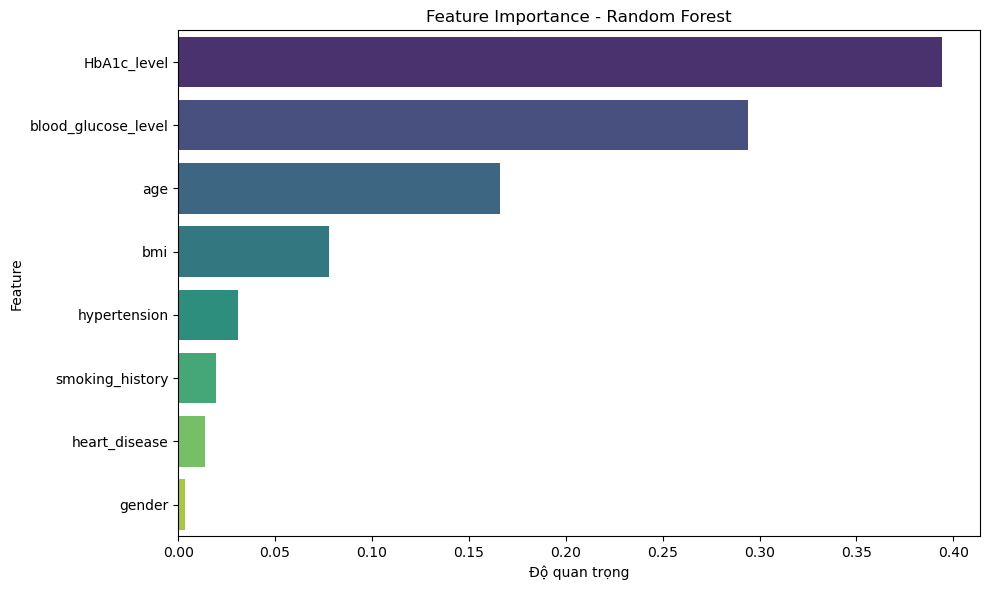

In [9]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print(importances)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Độ quan trọng')
plt.tight_layout()
plt.show()

### 6. Confusion Matrix (Random Forest)

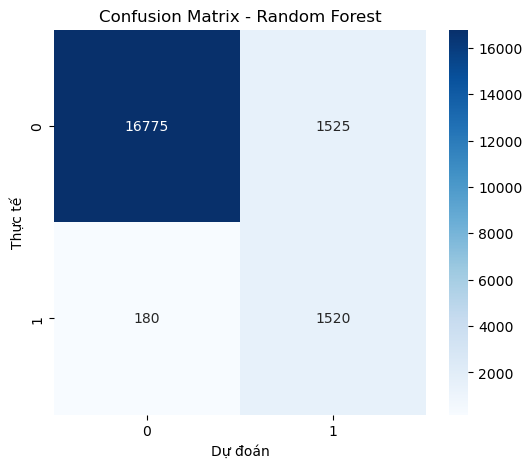

In [10]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

## **KẾT LUẬN**

| Mô hình          | Accuracy | Recall (diabetic) | F1-score (diabetic) |
|------------------|----------|-------------------|---------------------|
| Decision Tree    | ~0.8844   | ~0.9288            | ~0.5774             |
| **Random Forest**| **0.9147**| **0.8941**         | **0.6407**           |

**Random Forest vượt trội hoàn toàn** và đạt hiệu suất rất cao:
- Accuracy: 91.47%  
- Recall lớp bệnh: 89.41% → phát hiện được gần 90% người thực sự bị tiểu đường  
- F1-score lớp bệnh: 0.6407 → cân bằng tốt giữa precision và recall

**Các yếu tố quan trọng nhất:**
1. HbA1c_level (39.4%)
2. blood_glucose_level (29.4%)
3. age (16.6%)
4. bmi (7.7%)

**Đề xuất triển khai:**
- Sử dụng **Random Forest** (300 cây, max_depth=12) làm mô hình chính
- Có thể triển khai thực tế để sàng lọc sớm bệnh tiểu đường với độ tin cậy rất cao
- Ưu tiên đo HbA1c và đường huyết fasting vì đây là 2 chỉ số quan trọng nhất

---
# <Center>**END**<center>